#Extração

### Importação do dump/backup para um banco de dados Relacional (SQL)

Passo a passo para se fazer um backup no PostgresSQL:

1. Criar o database que irar receber o backup.
2. Click direito no BD + RESTORE
3. Preencher com as seguintes informacões:


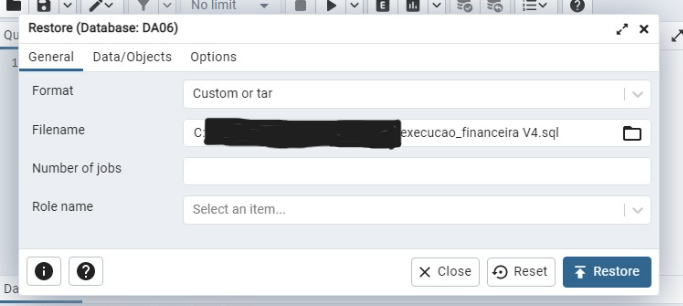

4. Aguardar o processo de Restore, possivel visualizar na aba Processes

Pronto!
Após a execução dos passos acima, finalizado o processo e dado o REFRESH no banco deverá aparecer no Schemas.


## Modelagem Lógica

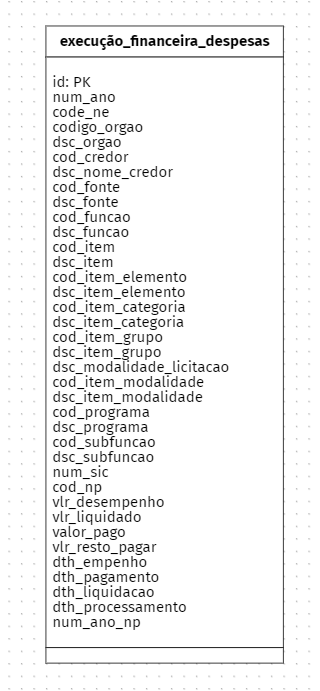

# Análise Exploratória dos Dados (entendimento da base, padrões, nulos,investigações, descobertas e etc) e Transformação

### Documentação das colunas

In [ ]:
import pandas as pd

data = {'Descrição': ['Identificador da tabela.','Ano','Código Número Empenho','Código do Orgão','Descrição do Orgão','Código do Credor','Nome do Credor','Codigo da Fonte','Descrição da Fonte','Cõdigo da Função','Descrição da Função','Código do Item','Descrição do Item','Código do Item do Elemento','Descrição do Elemento do Item','Código da Categoria do Item','Descrição da Categoria do Item','Código do Gupo do Item','Descrição do Grupo do Item','Descrição da Modalidade da Licitação','Códgio do Modalidade do Item','Descrição da Modalidade do Item','Código do Programa','Descrição do Programa','Código da Subfunção','Descrição da Subfunção','Número do Serviço de Informação do Cidadão','Código do Número do Processo','Valor do Empenho, Valor Total','Valor Liquidado, Valor Empenho - Valor Pago','Valor Pago','Valor Restante a Pagar','Data do Pagamento','Data da Liquidação','Data do Processamento/Empenho','Número do Ano do Número do Processo']}
indexes = ['id', 'num_ano','cod_ne','codigo_orgao','dsc_orgao','cod_credor','dsc_nome_credor','cod_fonte', 'dsc_fonte', 'cod_funcao','dsc_função','cod_item','dsc_item','cod_item_elemento','dsc_item_elemento','cod_item_categoria','dsc_item_categoria','cod_item_grupo' ,'dsc_item_grupo','dsc_modalidade_licitação','cod_item_modalidade','dsc_item_modalidade','cod_programa','dsc_programa','cod_subfuncao','dsc_subfuncao','num_sic','cod_np','vlr_empenho','vlr_liquidado','vlr_pago','vlr_resto_pagar','dth_pagamento', 'dth_liquidacao','dth_processamento','num_ano_np']
df = pd.DataFrame(data, index = indexes)
df


,Descrição
id,Identificador da tabela.
num_ano,Ano
cod_ne,Código Número Empenho
codigo_orgao,Código do Orgão
dsc_orgao,Descrição do Orgão
cod_credor,Código do Credor
dsc_nome_credor,Nome do Credor
cod_fonte,Codigo da Fonte
dsc_fonte,Descrição da Fonte
cod_funcao,Cõdigo da Função


### Presença de Nulls

A tabela **execucao_financeira_despesa** possui a seguinte quantidade de linhas:

| Tamanho |
|----------|
| 2025116 |

Esse valor pode ser encontrado ao executar a seguinte consulta.

``` postgresql
SELECT COUNT(*)
FROM execucao _financeira_despesa

```
Para essa consulta também podemos substituir o * por uma coluna que sabemos que não pode ser *Null* como, por exemplo, a coluna id, encontrando, assim, a quantidade total de linhas da tabela *execucao_financeira_despesa*

Ao utilizar a consulta SQL abaixo, podemos verificar a quantidade de NULLs por coluna:
``` postgresql
SELECT COUNT(*)
FROM execucao _financeira_despesa AS Qtde_Nulls
WHERE column_name IS NULL;

```
Ao realizar esse *SELECT* para cada uma das colunas podemos verificar a existência de nulls e a quantidade para cada coluna.

Abaixo é apresentado um gráfico de barras vertical com quais colunas dentro dessa tabela apresentam valores null e a porcentagem desses valores no escopo da tabela.


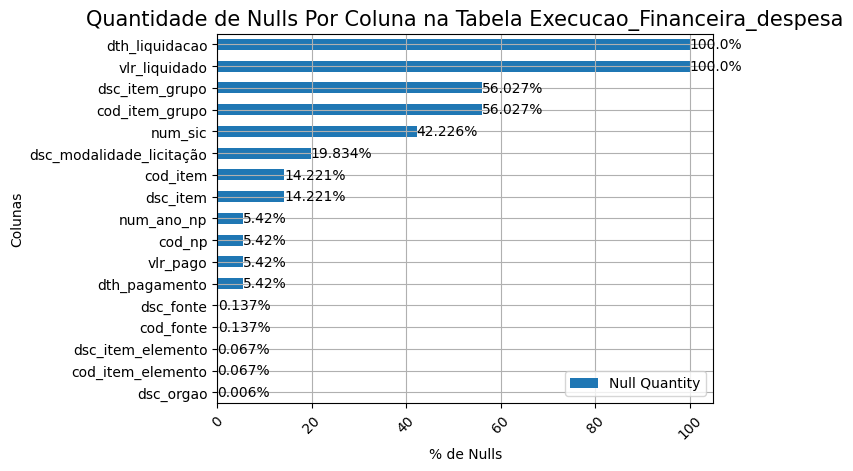

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Data
columns = ['Null Quantity']
indexes = ['id', 'num_ano','cod_ne',
           'codigo_orgao','dsc_orgao',
           'cod_credor','dsc_nome_credor',
           'cod_fonte', 'dsc_fonte',
           'cod_funcao','dsc_função',
           'cod_item','dsc_item',
           'cod_item_elemento','dsc_item_elemento',
           'cod_item_categoria','dsc_item_categoria',
           'cod_item_grupo', 'dsc_item_grupo',
           'dsc_modalidade_licitação',
           'cod_item_modalidade','dsc_item_modalidade',
           'cod_programa','dsc_programa',
           'cod_subfuncao','dsc_subfuncao',
           'num_sic','cod_np',
           'vlr_empenho','vlr_liquidado','vlr_pago','vlr_resto_pagar',
           'dth_empenho', 'dth_pagamento', 'dth_liquidacao','dth_processamento',
           'num_ano_np']

data = [[0],[0],[0],[0],[116],[0],[0],[2775],[2775],[0], [0],[287982],[287982],[1366],
    [1366],[0], [0],[1134605],[1134605],[401656],[0],[0],[0],[0],[0],[0],[855132],[109765],
    [0],[2025116],[109765],[0],[0],[109765],[2025116],[0],[109765]]



df = pd.DataFrame (data = data, columns = columns, index = indexes)
#Getting only rows wher Null Quantity > 0
df_no0 = df.loc[(df!=0).any(axis=1)]
df_no0 = df_no0.sort_values(by='Null Quantity', ascending=True)

def calculate_percentage(value, total):
  return round((value/total)*100,3)

total = 2025116
percentage_list = []
for i in df_no0['Null Quantity']:
  percentage_list.append(calculate_percentage(i, total))
df_no0['Null Quantity'] = percentage_list


#Plot
df_no0.plot(kind='barh')
plt.title("Quantidade de Nulls Por Coluna na Tabela Execucao_Financeira_despesa", fontsize=15)
plt.ylabel("Colunas")
plt.xlabel("% de Nulls")
plt.xticks(fontsize=10, rotation=45, horizontalalignment="center")
plt.grid(True)
plt.legend(loc='lower right')

for i, (p, pr) in enumerate(zip(df_no0.index, df_no0['Null Quantity'])):
     plt.text(s=str(pr)+'%', x=pr, y=i, color="black",verticalalignment="center", horizontalalignment="left", size=10)


plt.show()

### Padronização de Strings

**Extension UNACCENT**

Unaccent is a text search dictionary that removes accents (diacritic signs) from lexemes. It's a filtering dictionary, which means its output is always passed to the next dictionary (if any), unlike the normal behavior of dictionaries. This allows accent-insensitive processing for full text search.

COMO CONFIGURAR:
``` postgresql
CREATE EXTENSION unaccent;
```
COMO UTILIZAR:
```postgresql
--Exemplo de utilização da extensão unaccent:
SELECT unaccent('João')


--Exemplo de como foi utilizado nesse trabalho:
SELECT DISTINCT
ROW_NUMBER() OVER (ORDER BY dsc_item_grupo) AS CODIGO
, UPPER (unaccent (REGEXP_REPLACE(dsc_item_grupo, '[^\s-][[^a-zA-Z\s-]+\-', '', 'g'))) AS DESCRICAO_ITEM_GRUPO
FROM public.execucao_financeira_despesa
GROUP BY dsc_item_grupo

```

Para mais detalhes sobre a extensão unaccent do PostgreSQL: [Unaccent Doc](https://www.postgresql.org/docs/current/unaccent.html)

Para alguns campos de texto, notou-se a presença de:


1.   Valores Númericos dentro do campo de texto de algumas colunas
2.   Valores duplicados devido à existencia de entradas com **UPPERCASE** e **LOWERCASE**.
3. Valores duplicados devido à acentuação
4. Espaços em branco a mais

Pode-se fazer a verificação através da consulta
```postgresql
SELECT
ROW_NUMBER() OVER (ORDER BY column_name) AS CODIGO
, column_name AS DESCRICAO
FROM public.execucao_financeira_licitacao
GROUP BY column_name
```

Imagens de Exemplo:

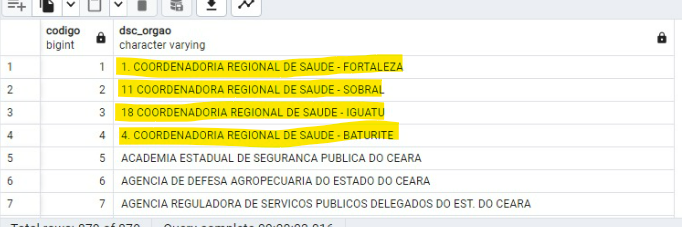

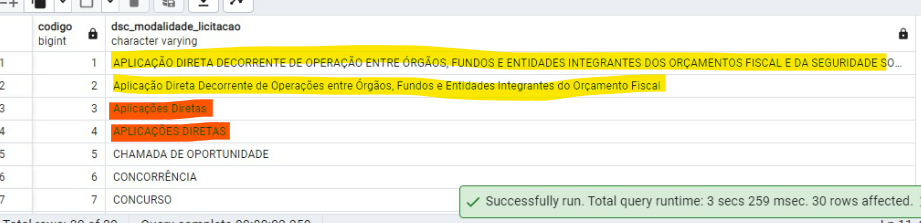


Logo, com o intuito de realizar uma padronização nas colunas de *VARCHAR()* foi utilizado  *regex* juntamente com a função do POSTGRESQL **REGEXP_REPLACE**,
como no exemplo abaixo para normalizar todas as colunas dessa categoria.

```postgresql
SELECT
DISTINCT UPPER(REGEXP_REPLACE(column_name, '[^-\s][^\a-zA-Z\s-]+\-', '', 'g'))
FROM public.execucao_financeira_despsa
```
O regex utilizado irá retirar:
* Espaços em branco no começo e fim da string
* Retirar números da string
* Retirar caracteres Especiais, com excessão do -  

Além disso é utilizado a função UPPER() para padronizar as strings em UPPERCASE.

## Padronização de códigos

### Coluna **num_sic**


E possível verificar que a coluna **num_sic** apresenta dois diferentes padrões de entrada.

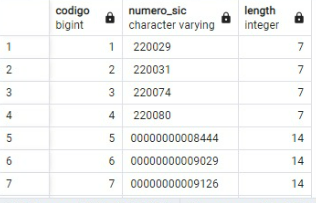


1.   No caso de 121.433 rows o código apresenta uma formatação de 14 dígitos.
2.   No caso de 48.756 rows o código apresenta uma formatação de 7 dígitos.

Tal constatação pode ser feita através do *SELECT*

```postgresql
SELECT
ROW_NUMBER() OVER (ORDER BY column_name) AS CODIGO
, column_name AS NUMERO
, LENGTH(column_name) AS LENGTH_STRING
FROM public.execucao_financeira_despesa
WHERE 1=1
AND LENGTH(column_name) !=7
AND LENGTH(column_name) !=14
GROUP BY column_name
```

Para a padronização foi feito um preenchimento com zeros à esquerda para deixar todos os *num_sic* padronizados com 14 dígitos.

```postgresql
SELECT DISTINCT
REGEXP_REPLACE (LPAD (column_name, 14, '0'), '\s+$', '', 'g')
FROM public.execucao_financeira_despesa
WHERE 1=1
AND num_sic IS NOT NULL
```



### Coluna **cod_ne** e **cod_np**

Na coluna **cod_np** e também **cod_ne** ocorre uma situação semelhante. Nesse caso temos códigos com dois padrões distintos, sendo eles:


1.  Em algumas rows o código possui tamanho de 12 dígitos
2.  Em algumas rows o código possui tamanho de 8 dígitos

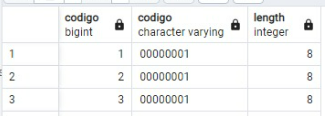

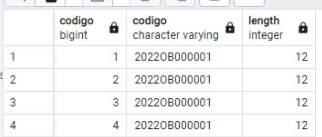

Tal constatação pode ser feita com uma consulta semelhante a apresentada na célula acima,

```postgresql
SELECT
ROW_NUMBER() OVER (ORDER BY column_name) AS CODIGO
, column_name AS NUMERO_CODIGO
, LENGTH(column_name) AS LENGTH_STRING
FROM public.execucao_financeira_despesa
WHERE 1=1
AND LENGTH(column_name) !=8
AND LENGTH(column_name) !=12
GROUP BY column_name
```

Para efetuar a pradronização dessa coluna iremos utilizar o mesmo procedimento utilizado para o *num_sic* porém padronizando o *cod_np* em 12 dígitos.

```postgresql
SELECT DISTINCT
REGEXP_REPLACE (LPAD (column_name, 12, '0'), '\s+$', '', 'g')
FROM public.execucao_financeira_despesa
WHERE 1=1
AND num_sic IS NOT NULL
```

O *REGEXP_REPLACE* é novamente utilizado para evitar que haja espaço em branco entre os zeros à esquerda e a string original.


## Padronização de valores monetários

Para as colunas que representam valores monatários, que apresentam valores nulls, como:


*   vlr_liquidado
*   valor_pago


Será atribuido o valor *0* para as rows que estão com valor *NULL* para que haja o tratamento dos NULLs e não venha a afetar quaisquer consultas futuras.
Para tal tratamento será utilizada a função
```postgresql
COALESCE(column_name, value_to_replace)
```
Logo, o *SELECT* para as colunas mencionadas acima será:

```postgresql
SELECT
ROW_NUMBER() OVER (ORDER BY column_name) AS CODIGO
, COALESCE (column_name, 0)
FROM public.execucao_financeira_despesa
WHERE 1=1
GROUP BY column_name

```

Adicionalmente, o *POSTGRESQL* conta com tipos monetarios, os quais podem ser atribuidos a uma row no SELECT para retornar o número na formatação adequada de moeda. No caso basta adicionar *::money* à direita da coluna.

Para mais detalhes: [PostgreSQL Monetary Types DOC](https://www.postgresql.org/docs/current/datatype-money.html)


## Padronização de datas

Para os valores de data temos presentes dois tipos de *DATETIME*, sendo eles

1. dth_liquidacao
2. dth_pagamento e dth_processamento
3. num_ano e num_ano_np

Para o caso (1) foi constatado que a coluna é 100% compost de Nulls, por esse motivo dth_liquidação não será utilizada
No (2) temos a formatação 'YYYY-MM-DD', logo, usaremos essa formatação para padronizar as datas presentes na tabela.
No caso das colunas (3) há apenas a data que compõe o ano, logo, para manter a padronização e conseguir futuramente construir uma união entre as diferentes colunas de datas será atribuido à cada ano presente em *num_ano* e *num_ano_np* '-01-01'.

```postgresql
SELECT DISTINCT (DATE (column_name||'-01-01'))
```
Obs: Foi utilizando em particular o preenchimento '-01-01' pois não há nenhuma outra data que possui essa configuração.

# Modelagem dos dados no BrModelo (Modelo Multidimensional)

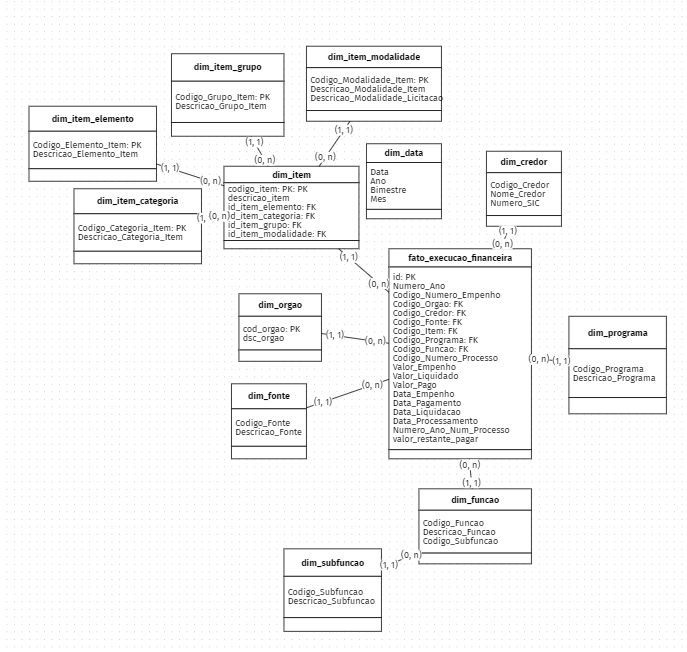

#Criação do DW

### DIM_ITEM_CATEGORIA

``` postgresql
CREATE TABLE dw.dim_item_categoria AS
SELECT DISTINCT
ROW_NUMBERS() OVER (ORDER BY dsc_item_categoria) AS CODIGO_ITEM_CATEGORIA
, UPPER (unaccent (REGEXP_REPLACE(dsc_item_categoria, '[^-\s][^a-zA-Z\s-]+\-', '', 'g'))) AS DESCRICAO_ITEM_CATEGORIA
FROM public.execucao_financeira_despesa
GROUP BY dsc_item_categoria;

```

### DIM_ITEM_ELEMENTO


```postgresql
CREATE TABLE dw.dim_item_elemento AS
SELECT DISTINCT
ROW_NUMBER() OVER (ORDER BY dsc_item_elemento) AS CODIGO_ITEM_ELEMENTO
, UPPER( unaccent(REGEXP_REPLACE(dsc_item_elemento, '[^-\s][^a-zA-Z\s-]+\-', '', 'g'))) AS DESCRICAO_ITEM_ELEMENTO
FROM public.execucao_financeira_despesa
GROUP BY dsc_item_elemento;

```

### DIM_ITEM_GRUPO



```postgresql
CREATE TABLE dw.dim_item_grupo AS
SELECT DISTINCT
ROW_NUMBER() OVER (ORDER BY dsc_item_grupo) AS CODIGO_ITEM_GRUPO
, UPPER( unaccent(REGEXP_REPLACE(dsc_item_grupo, '[^-\s][^a-zA-Z\s-]+\-', '', 'g'))) AS DESCRICAO_ITEM_GRUPO
FROM public.execucao_financeira_despesa
GROUP BY dsc_item_grupo

```

### DIM_ITEM_MODALIDADE


```postgresql
CREATE TABLE dw.dim_item_modalidade AS
SELECT DISTINCT
ROW_NUMBER() OVER (ORDER BY dsc_item_modalidade) AS CODIGO_ITEM_MODALIDADE
, UPPER( unaccent(REGEXP_REPLACE(dsc_item_modalidade, '[^-\s][^a-zA-Z\s-]+\-', '', 'g'))) AS DESCRICAO_ITEM_ELEMENTO
, UPPER( unaccent(REGEXP_REPLACE(dsc_modalidade_licitacao, '[^-\s][^a-zA-Z\s-]+\-', '', 'g'))) AS DESCRICAO_MODALIDADE_LICITACAO
FROM public.execucao_financeira_despesa
GROUP BY dsc_item_modalidade
, dsc_modalidade_licitacao

```

### DIM_ITEM

```postgresql
CREATE TABLE dw.dim_item AS
SELECT DISTINCT
ROW_NUMBER() OVER (ORDER BY dsc_item) AS CODIGO_ITEM
, UPPER( unaccent(REGEXP_REPLACE(dsc_item, '[^-\s][^a-zA-Z\s-]+\-', '', 'g'))) AS DESCRICAO_ITEM
, ROW_NUMBER() OVER (ORDER BY dsc_item_elemento) AS CODIGO_ITEM_ELEMENTO
, ROW_NUMBER() OVER (ORDER BY dsc_item_categoria) AS CODIGO_ITEM_CATEGORIA
, ROW_NUMBER() OVER (ORDER BY dsc_item_grupo) AS CODIGO_ITEM_GRUPO
, ROW_NUMBER() OVER (ORDER BY dsc_item_modalidade) AS CODIGO_ITEM_MODALIDADE
FROM public.execucao_financeira_despesa
GROUP BY dsc_item
, dsc_item_elemento
, dsc_item_categoria
, dsc_item_grupo
, dsc_item_modalidade

```

### DIM_ORGAO

```postgresql
CREATE TABLE dw.dim_orgao AS
SELECT DISTINCT
ROW_NUMBER() OVER (ORDER BY dsc_orgao) AS CODIGO_ORGAO
, UPPER (unaccent (REGEXP_REPLACE(dsc_orgao, '[^\s-][^a-zA-Z\s-]', '', 'g'))) AS DESCRICAO_ORGAO
FROM public.execucao_financeira_despesa
GROUP BY dsc_orgao
```

### DIM_FONTE

```postgresql
CREATE TABLE dw.dim_fonte AS
SELECT DISTINCT
ROW_NUMBER() OVER (ORDER BY dsc_fonte) AS CODIGO_FONTE
, UPPER (unaccent (REGEXP_REPLACE(dsc_fonte, '[^\s-][^a-zA-Z\s-]+\-', '', 'g'))) AS DESCRICAO_FONTE
FROM public.execucao_financeira_despesa
GROUP BY dsc_fonte
```

```
# Isto está formatado como código
```



### DIM_PROGRAMA

```postgresql
CREATE TABLE dw.dim_programa AS
SELECT DISTINCT
ROW_NUMBER() OVER (ORDER BY dsc_fonte) AS CODIGO_FONTE
, UPPER (unaccent (REGEXP_REPLACE(dsc_fonte, '[^\s-][^a-zA-Z\s-]+\-', '', 'g'))) AS DESCRICAO_FONTE
FROM public.execucao_financeira_despesa
GROUP BY dsc_fonte

```

### DIM_CREDOR

```postgresql
CREATE TABLE dw.dim_credor AS
SELECT DISTINCT
ROW_NUMBER() OVER (ORDER BY dsc_nome_credor) AS CODIGO_CREDOR
, UPPER (unaccent (REGEXP_REPLACE(dsc_nome_credor, '[^\s-][^a-zA-Z\s-]+\-', '', 'g'))) AS DESCRICAO_CREDOR
, REGEXP_REPLACE( LPAD(num_sic, 14, '0'), '\s+$', '', 'g') AS NUMERO_SIC
FROM public.execucao_financeira_despesa
GROUP BY dsc_nome_credor
, num_sic
```

### DIM_DATA

```postgresql
CREATE TABLE dw.dim_data AS
SELECT DATA_COMPLETA
, DATE_PART ('year', DATA_COMPLETA) AS NUMERO_ANO
, DATE_PART ('month', DATA_COMPLETA) AS NUMERO_MES
, CASE
  WHEN DATE_PART ('month', DATA_COMPLETA) IN (1,2) THEN 1
  WHEN DATE_PART ('month', DATA_COMPLETA) IN (3,4) THEN 2
  WHEN DATE_PART ('month', DATA_COMPLETA) IN (5,6) THEN 3
  WHEN DATE_PART ('month', DATA_COMPLETA) IN (7,8) THEN 4
  WHEN DATE_PART ('month', DATA_COMPLETA) IN (9,10) THEN 5
  WHEN DATE_PART ('month', DATA_COMPLETA) IN (11,12) THEN 6
END AS NUMERO_BIMESTRE
, DATE_PART('week', DATA_COMPLETA) AS NUMERO_SEMANA
, DATE_PART('day', DATA_COMPLETA) AS NUMERO_DIA
FROM(
  SELECT DISTINCT (DATE(num_ano||'-01-01')) AS DATA_COMPLETA
  FROM execucao_financeira_despesa
  UNION
  SELECT DISTINCT dth_pagamento AS DATA_COMPLETA
  FROM execucao_financeira_despesa
  WHERE dth_pagamento IS NOT NULL
  UNION
  SELECT DISTINCT dth_processamento AS DATA_COMPLETA
  FROM execucao_financeira_despesa
  WHERE dth_processamento IS NOT NULL
  UNION
  SELECT DISTINCT (DATE (num_ano_np||'-01-01')) AS DATA_COMPLETA
  FROM execucao_financeira_despesa
  WHERE num_ano_np IS NOT NULL
) DATA_COMPLETA
GROUP BY DATA_COMPLETA

```

### DIM_SUBFUNCAO

```postgresql
CREATE TABLE dw.dim_subfuncao AS
SELECT DISTINCT
ROW_NUMBER() OVER(ORDER BY dsc_subfuncao) AS CODIGO_SUBFUNCAO
, UPPER(unaccent(REGEXP_REPLACE(dsc_subfuncao, '[^\s-][^a-zA-Z\s-]+\-', '', 'g'))) AS DESCRICAO_SUBFUNCAO
FROM public.execucao_financeira_despesa
GROUP BY dsc_subfuncao
```

### DIM_FUNCAO

```postgresql
CREATE TABLE dw.dim_funcao AS
SELECT DISTINCT
ROW_NUMBER() OVER(ORDER BY dsc_funcao) AS CODIGO_FUNCAO
, UPPER(unaccent(REGEXP_REPLACE(dsc_subfuncao, '[^\s-][^a-zA-Z\s-]+\-', '', 'g'))) AS DESCRICAO_FUNCAO
, ROW_NUMBER() OVER(ORDER BY dsc_subfuncao) AS CODIGO_SUBFUNCAO
FROM public.execucao_financeira_despesa
GROUP BY dsc_funcao
, dsc_subfuncao
```

### FATO_EXECUCAO_FINANCEIRA

```postgresql
CREATE TABLE dw.fato_execucao_financeira AS
SELECT
id AS ID
, (DATE (num_ano||'-01-01')) AS NUMERO_ANO
, REGEXP_REPLACE (LPAD(cod_ne, 12, '0'), '\s+$', '', 'g') AS CODIGO_NUMERO_EMPENHO
, ROW_NUMBER() OVER (ORDER BY dsc_orgao) AS CODIGO_ORGAO
, ROW_NUMBER() OVER (ORDER BY dsc_nome_credor) AS CODIGO_CREDOR
, ROW_NUMBER() OVER (ORDER BY dsc_fonte) AS CODIGO_FONTE
, ROW_NUMBER() OVER (ORDER BY dsc_item) AS CODIGO_ITEM
, ROW_NUMBER() OVER (ORDER BY dsc_programa) AS CODIGO_PROGRAMA
, ROW_NUMBER() OVER (ORDER BY dsc_funcao) AS CODIGO_FUNCAO
, REGEXP_REPLACE(LPAD(cod_np, 12, '0'), '\s+$', '', 'g') AS CODIGO_NUMERO_PROCESSO
, CASE
  WHEN vlr_empenho IS NOT NULL THEN vlr_empenho
  WHEN vlr_empenho IS NULL THEN COALESCE (vlr_empenho,0)
END AS VALOR_EMPENHO
, COALESCE(vlr_liquidado,0) AS VALOR_LIQUIDADO
, CASE
  WHEN valor_pago IS NOT NULL THEN valor_pago
  WHEN valor_pago IS NULL THEN COALESCE(valor_pago,0)
END AS VALOR_PAGO
, CASE
  WHEN vlr_resto_pagar IS NOT NULL THEN vlr_resto_pagar
  WHEN vlr_resto_pagar IS NULL THEN COALESCE(vlr_resto_pagar,0)
END AS VALOR_RESTANTE_PAGAR
, dth_empenho AS DATA_EMPENHO
, dth_liquidacao AS DATA_LIQUIDACAO
, dth_pagamento AS DATA_PAGAMENTO
, (DATE (num_ano_np || '-01-01')) AS NUMERO_ANO_PROCESSO
FROM execucao_financeira_despesa
```

#Aferição de Medida, Consultas, Plotagem:
    [Pandas](https://pandas.pydata.org/docs/user_guide/visualization.html)    
    [Matplotlib](https://matplotlib.org/stable/plot_types/index.html)

#### Por Periodo

##### Período Anual

Consulta SQL:
```postgresql
SELECT
d.numero_ano
, SUM(e.valor_empenho) AS TOTAL_VALOR_EMPENHO
, SUM(e.valor_pago) AS TOTAL_VALOR_PAGO
, SUM(e.valor_restante_pagar) AS TOTAL_RESTANTE_PAGAR
FROM data_warehouse.fato_execucao_financeira e
INNER JOIN
data_warehouse.dim_data d
ON
e.data_pagameto = d.data_completa
OR
e.data_empenho = d.data_completa
GROUP BY d.numero_ano
```

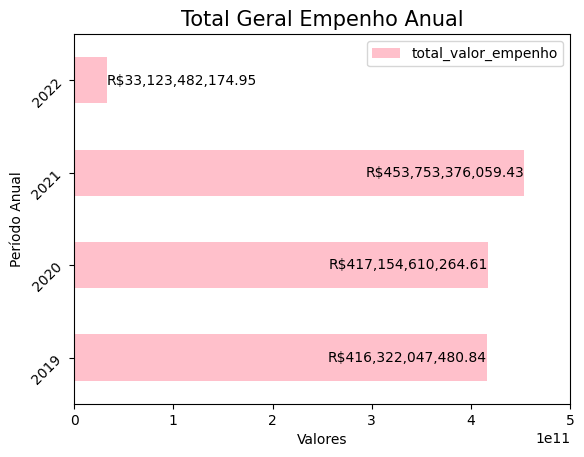

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('/content/ResultVLREMEPNHOANUAL (1).csv')


def format_currency(x):
    return "R${:,.2f}".format(x)

df.set_index('numero_ano').plot(kind='barh', color='pink')
plt.xlim(0, 500000000000)
plt.yticks(rotation=45, horizontalalignment="right")
plt.title("Total Geral Empenho Anual", fontsize=15)
plt.ylabel("Período Anual")
plt.xlabel("Valores")
plt.grid(False)
plt.legend(loc='upper right')

for i, (p, pr) in enumerate(zip(df['numero_ano'],  df['total_valor_empenho'])):
  if i == 3:
    plt.text(s=format_currency(pr), x=pr, y=i, color="black",verticalalignment="center", horizontalalignment="left", size=10)
  else:
    plt.text(s=format_currency(pr), x=pr-10, y=i, color="black",verticalalignment="center", horizontalalignment="right", size=10)


plt.show()


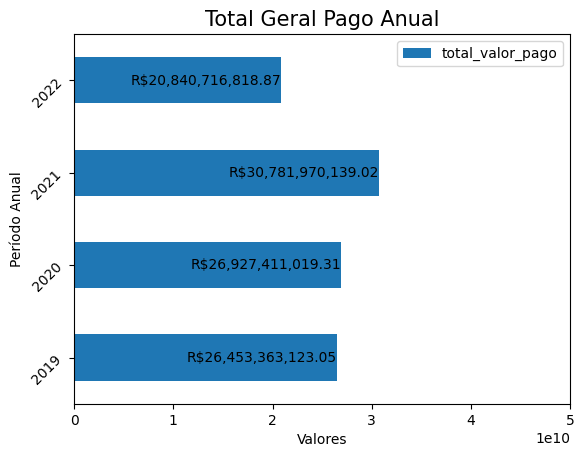

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('/content/ResultVLRPAGOTOTAL.csv')

def format_currency(x):
    return "R${:,.2f}".format(x)

df.set_index('numero_ano').plot(kind='barh')
plt.xlim(0, 50000000000)
plt.title("Total Geral Pago Anual", fontsize=15)
plt.yticks(rotation=45, horizontalalignment="right")
plt.ylabel("Período Anual")
plt.xlabel("Valores")
plt.grid(False)
plt.legend(loc='upper right')

for i, (p, pr) in enumerate(zip(df['numero_ano'],  df['total_valor_pago'])):
  plt.text(s=format_currency(pr), x=pr-10, y=i, color="black",verticalalignment="center", horizontalalignment="right", size=10)


plt.show()



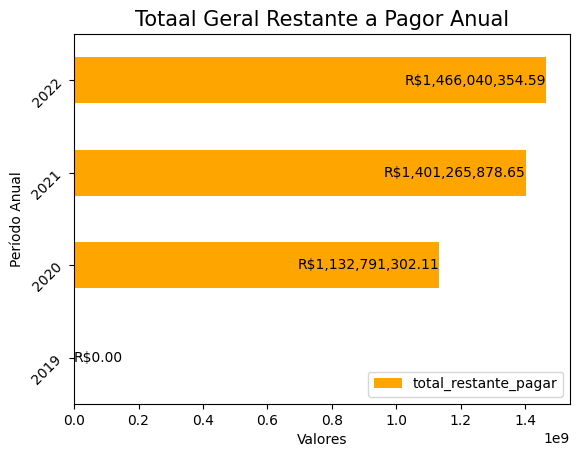

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('/content/ResultTOTALVALORRESTANTEANUAL.csv')

def format_currency(x):
    return "R${:,.2f}".format(x)

df.set_index('numero_ano').plot(kind='barh', color='orange')
plt.title("Totaal Geral Restante a Pagor Anual", fontsize=15)
plt.ylabel("Período Anual")
plt.yticks(rotation=45, horizontalalignment="right")
plt.xlabel("Valores")
plt.grid(False)
plt.legend(loc='lower right')

for i, (p, pr) in enumerate(zip(df['numero_ano'],  df['total_restante_pagar'])):
  if i == 0:
    plt.text(s=format_currency(pr), x=pr-10, y=i, color="black",verticalalignment="center", horizontalalignment="left", size=10)
  else:
    plt.text(s=format_currency(pr), x=pr-10, y=i, color="black",verticalalignment="center", horizontalalignment="right", size=10)


plt.show()

##### Período Mensal

**Consulta **negrito** SQL:**

```postgresql
SELECT
d.numero_mes
, SUM(e.valor_empenho) AS TOTAL_VALOR_EMPENHO
, SUM(e.valor_pago) AS TOTAL_VALOR_PAGO
, SUM(e.valor_restante_pagar) AS TOTAL_RESTANTE_PAGAR
FROM data_warehouse.fato_execucao_financeira e
INNER JOIN
data_warehouse.dim_data d
ON
e.data_pagameto = d.data_completa
OR
e.data_empenho = d.data_completa
GROUP BY d.numero_mes
;

```

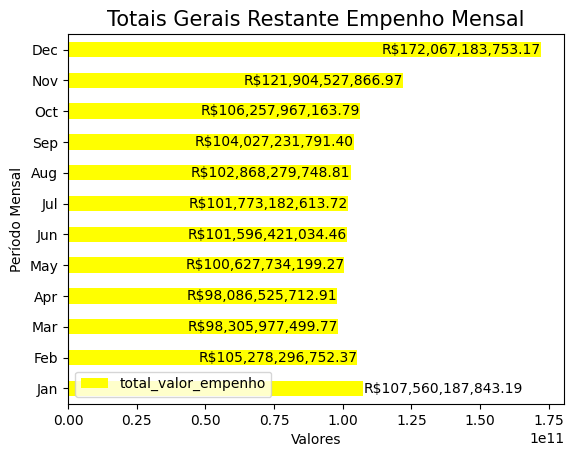

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import calendar


df = pd.read_csv('/content/resultempenhomensal.csv')

def format_currency(x):
    return "R${:,.2f}".format(x)

def number_to_month_name(x):
  return calendar.month_abbr[x]

#Transform number to month abbreviation
month_abr=[]
for i in df['numero_mes']:
  month_abr.append(number_to_month_name(i))
df['numero_mes'] = month_abr

#Correct Indexes
df.set_index('numero_mes')

#Plot 1
df.set_index('numero_mes').plot(kind='barh', color='yellow')
plt.title("Totais Gerais Restante Empenho Mensal", fontsize=15)
plt.ylabel("Período Mensal")
plt.xlabel("Valores")
plt.grid(False)
plt.legend(loc='lower left')

for i, (p, pr) in enumerate(zip(df['numero_mes'],  df['total_valor_empenho'])):
  if i == 0:
    plt.text(s=format_currency(pr), x=pr-10, y=i, color="black",verticalalignment="center", horizontalalignment="left", size=10)
  else:
    plt.text(s=format_currency(pr), x=pr-10, y=i, color="black",verticalalignment="center", horizontalalignment="right", size=10)




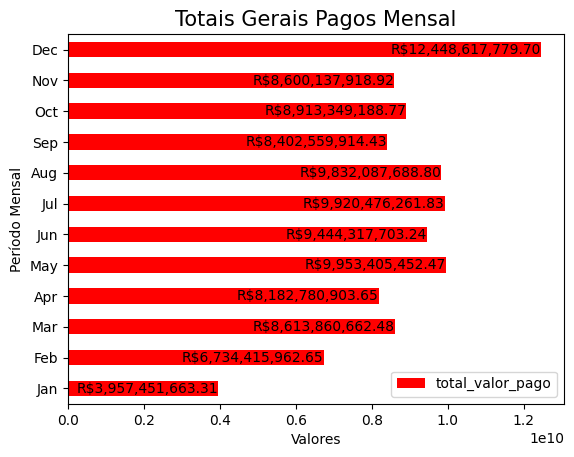

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import calendar


df1= pd.read_csv('/content/resultpagomensal.csv')

def format_currency(x):
    return "R${:,.2f}".format(x)

def number_to_month_name(x):
  return calendar.month_abbr[x]

#Transform number to month abbreviation
month_abr=[]
for i in df1['numero_mes']:
  month_abr.append(number_to_month_name(i))
df1['numero_mes'] = month_abr


#Correct Indexes
df1.set_index('numero_mes')

#Plot 2
df1.set_index('numero_mes').plot(kind='barh', color='red')
plt.title("Totais Gerais Pagos Mensal", fontsize=15)
plt.ylabel("Período Mensal")
plt.xlabel("Valores")
plt.grid(False)
plt.legend(loc='lower right')

for i, (p, pr) in enumerate(zip(df1['numero_mes'],  df1['total_valor_pago'])):
    plt.text(s=format_currency(pr), x=pr-10, y=i, color="black",verticalalignment="center", horizontalalignment="right", size=10)




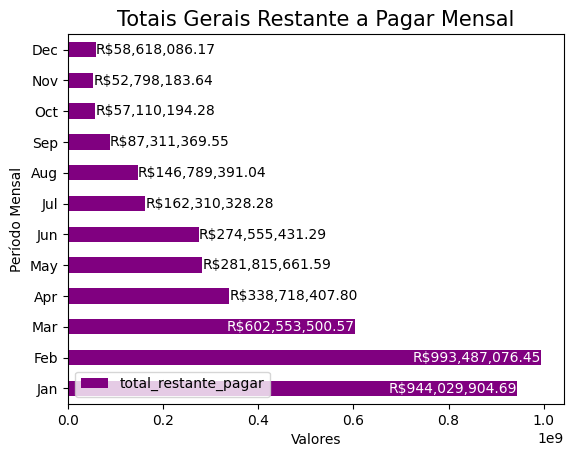

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

df2= pd.read_csv('/content/resultrestantepagarmensal.csv')

def format_currency(x):
    return "R${:,.2f}".format(x)

def number_to_month_name(x):
  return calendar.month_abbr[x]

#Transform number to month abbreviation
month_abr=[]
for i in df2['numero_mes']:
  month_abr.append(number_to_month_name(i))
df2['numero_mes'] = month_abr

#Correct Indexes
df2.set_index('numero_mes')

#Plot 3
df2.set_index('numero_mes').plot(kind='barh', color='purple')
plt.title("Totais Gerais Restante a Pagar Mensal", fontsize=15)
plt.ylabel("Período Mensal")
plt.xlabel("Valores")
plt.grid(False)
plt.legend(loc='lower left')

for i, (p, pr) in enumerate(zip(df2['numero_mes'],  df2['total_restante_pagar'])):
  if i in (3, 4, 5, 6, 7, 8, 9, 10, 11):
    plt.text(s=format_currency(pr), x=pr, y=i, color="black",verticalalignment="center", horizontalalignment="left", size=10)
  else:
    plt.text(s=format_currency(pr), x=pr, y=i, color="white",verticalalignment="center", horizontalalignment="right", size=10)


#####  Período Bimestral

Consulta SQL:
```postgresql
SELECT
d.numero_bimestre
, SUM(e.valor_empenho) AS TOTAL_VALOR_EMPENHO
, SUM(e.valor_pago) AS TOTAL_VALOR_PAGO
, SUM(e.valor_restante_pagar) AS TOTAL_RESTANTE_PAGAR
FROM data_warehouse.fato_execucao_financeira e
INNER JOIN
data_warehouse.dim_data d
ON
e.data_pagameto = d.data_completa
OR
e.data_empenho = d.data_completa
GROUP BY d.numero_bimestre
```

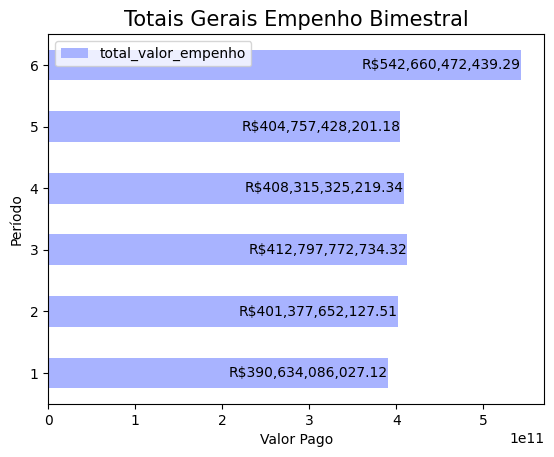

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

df= pd.read_csv('/content/resultempenhobimestral.csv')

def format_currency(x):
    return "R${:,.2f}".format(x)

#Correct Indexes
df.set_index('numero_bimestre')

#Plot 3
df.set_index('numero_bimestre').plot(kind='barh', color='#a8b3ff')
plt.title("Totais Gerais Empenho Bimestral", fontsize=15)
plt.ylabel("Período")
plt.xlabel("Valor Pago")
plt.grid(False)
plt.legend(loc='upper left')

for i, (p, pr) in enumerate(zip(df['numero_bimestre'],  df['total_valor_empenho'])):
  plt.text(s=format_currency(pr), x=pr, y=i, color="black",verticalalignment="center", horizontalalignment="right", size=10)



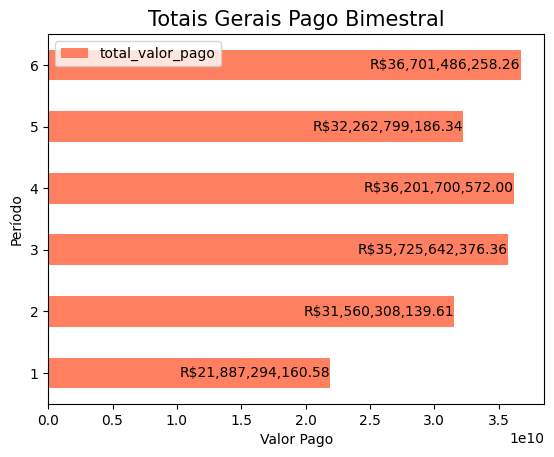

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

df= pd.read_csv('/content/resultpagobimetral.csv')

def format_currency(x):
    return "R${:,.2f}".format(x)

#Correct Indexes
df.set_index('numero_bimestre')

#Plot 3
df.set_index('numero_bimestre').plot(kind='barh', color='#ff8060')
plt.title("Totais Gerais Pago Bimestral", fontsize=15)
plt.ylabel("Período")
plt.xlabel("Valor Pago")
plt.grid(False)
plt.legend(loc='upper left')

for i, (p, pr) in enumerate(zip(df['numero_bimestre'],  df['total_valor_pago'])):
  plt.text(s=format_currency(pr), x=pr, y=i, color="black",verticalalignment="center", horizontalalignment="right", size=10)


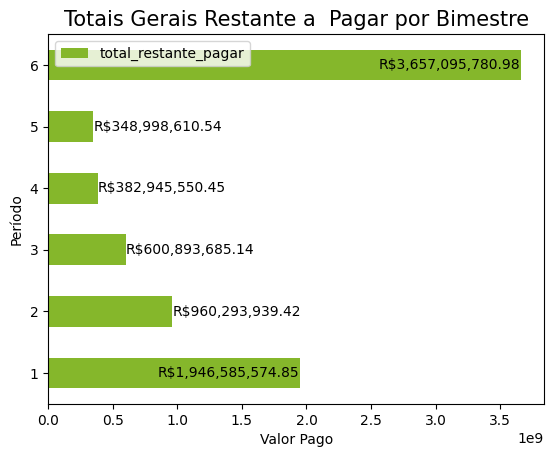

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

df= pd.read_csv('/content/resultrestantepagarbimestre.csv')

def format_currency(x):
    return "R${:,.2f}".format(x)

#Correct Indexes
df.set_index('numero_bimestre')

#Plot 3
df.set_index('numero_bimestre').plot(kind='barh', color='#85b72b')
plt.title("Totais Gerais Restante a  Pagar por Bimestre", fontsize=15)
plt.ylabel("Período")
plt.xlabel("Valor Pago")
plt.grid(False)
plt.legend(loc='upper left')

for i, (p, pr) in enumerate(zip(df['numero_bimestre'],  df['total_restante_pagar'])):
  if i in (1,2,3,4):
    plt.text(s=format_currency(pr), x=pr, y=i, color="black",verticalalignment="center", horizontalalignment="left", size=10)
  else:
    plt.text(s=format_currency(pr), x=pr, y=i, color="black",verticalalignment="center", horizontalalignment="right", size=10)


####  Por Orgão

Consulta SQL:

```postgresql
SELECT o.codigo_orgao
, o.descricao_orgao
, SUM(e.valor_empenho) AS TOTAL_VALOR_EMPENHO
, SUM(e.valor_pago) AS TOTAL_VALOR_PAGO
, SUM(e.valor_restante_pagar) AS TOTAL_RESTANTE_PAGAR
FROM data_warehouse.fato_execucao_financeira e
INNER JOIN
data_warehouse.dim_orgao o
ON
o.codgio_orgao = e.codigo_orgao
GROUP BY
o.codigo_orgao
, o.descricao_orgao;

```

##### Erh...

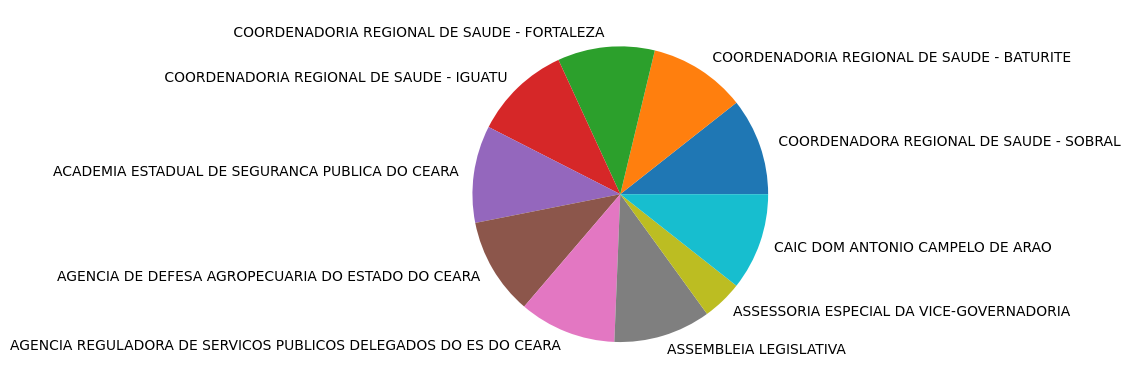

In [ ]:
import pandas as pd

df = pd.read_csv('/content/totaispororgao.csv')

y = df['total_valor_empenho']
labels = df['descricao_orgao']

plt.pie(y.iloc[0:10], labels = labels.iloc[0:10])
#plt.pie(y, labels = labels)


plt.show()
#Nenhum deu certo com os 876.

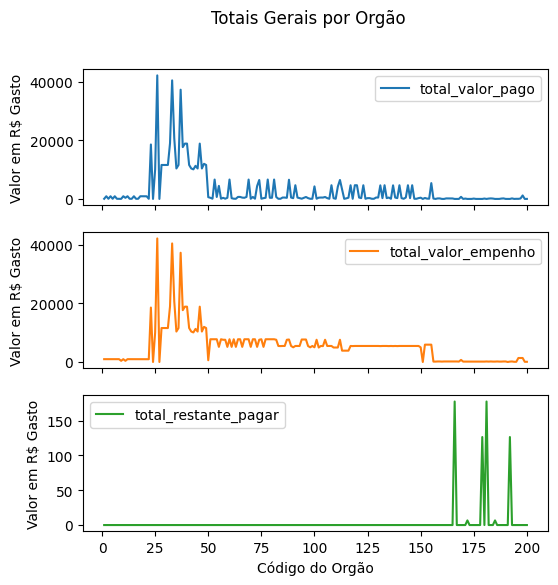

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

df= pd.read_csv('/content/totalpororgaocod.csv')

df1=df[['codigo_orgao', 'total_valor_pago', 'total_valor_empenho', 'total_restante_pagar']].copy()

#df1.set_index('codigo_orgao').iloc[0:15].plot.bar()
#df1.set_index('codigo_orgao').plot.hist(alpha=0.5);
#df1.set_index('codigo_orgao').iloc[0:50].plot(style="k--", label="Series");
df1.set_index('codigo_orgao').iloc[0:200].plot(
    subplots=True,
    figsize=(6, 6),
    xlabel = "Código do Orgão",
    ylabel="Valor em R$ Gasto",
    title= 'Totais Gerais por Orgão');

plt.grid(False)



#### Por Item

##### Por Item_Categoria

Consulta SQL:

```postgresql
SELECT
ic.codigo_item_categoria
, ic.descricao_item_categoria
, SUM(e.valor_empenho) AS TOTAL_VALOR_EMPENHO
, SUM(e.valor_pago) AS TOTAL_VALOR_PAGO
, SUM(e.valor_restante_pagar) AS TOTAL_RESTANTE_PAGAR
FROM date_warehouse.dim_item i
INNER JOIN
data_warehouse.fato_execucao_financeira e
ON
i.codigo_item = e.codigo_item
INNER JOIN
data_warehouse.dim_item_categoria
ON
i.id_item_categoria = ic.codigo_item_categoria
GROUP BY
ic.codigo_item_categoria
, ic.codigo_item_categoria
```

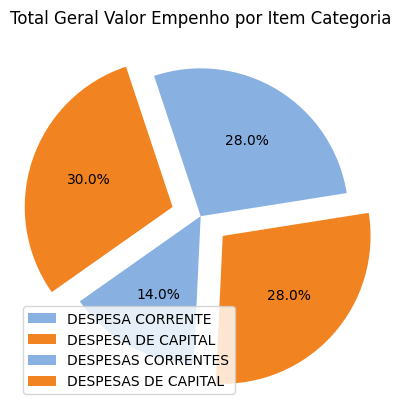

In [ ]:
import pandas as pd

df = pd.read_csv('/content/RESULTTOTALGERALITEMCATEGORIA.csv')
df1 = df.sort_values('descricao_item_categoria')


y = df1['total_valor_empenho']
labels = df1['descricao_item_categoria']

explode = (0.0, 0.2, 0.0, 0.2)
colors = ['#88b0e1', '#f18320']
plt.pie(y,
        colors=colors,
        startangle=9,
        explode = explode,
        autopct = lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '')

plt.legend(df['descricao_item_categoria'], loc="lower left")
plt.title('Total Geral Valor Empenho por Item Categoria')
plt.show()


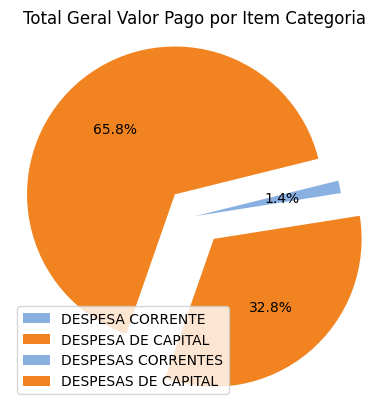

In [ ]:
import pandas as pd

df = pd.read_csv('/content/RESULTTOTALGERALITEMCATEGORIA.csv')
df1 = df.sort_values('descricao_item_categoria')


y = df1['total_valor_pago']
labels = df1['descricao_item_categoria']


explode = (0.0, 0.2, 0.0, 0.2)
colors = ['#88b0e1', '#f18320']
plt.pie(y,
        colors=colors,
        startangle=9,
        explode = explode,
        autopct = lambda p: '{:.1f}%'.format(p) if p > 0 else '')

plt.legend(df['descricao_item_categoria'], loc="lower left")
plt.title('Total Geral Valor Pago por Item Categoria')
plt.show()


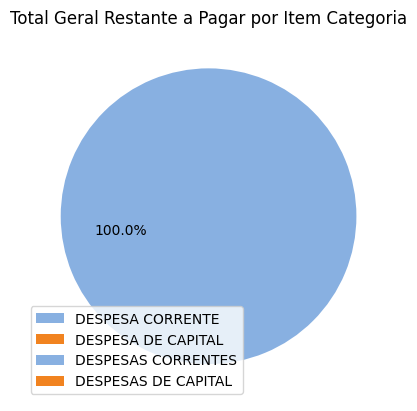

In [ ]:
import pandas as pd

df = pd.read_csv('/content/RESULTTOTALGERALITEMCATEGORIA.csv')
df1 = df.sort_values('descricao_item_categoria')


y = df1['total_restante_pagar']
labels = df1['descricao_item_categoria']

explode = (0.0, 0.2, 0.0, 0.2)
colors = ['#88b0e1', '#f18320']
plt.pie(y,
        colors=colors,
        startangle=9,
        explode = explode,
        autopct = lambda p: '{:.1f}%'.format(p) if p > 0 else '')

plt.legend(df['descricao_item_categoria'], loc="lower left")
plt.title('Total Geral Restante a Pagar por Item Categoria')
plt.show()

##### Por Item_Elemento

Consulta SQL:

```postgresql
SELECT
ic.codigo_item_elemento
, ic.descricao_item_elemento
, SUM(e.valor_empenho) AS TOTAL_VALOR_EMPENHO
, SUM(e.valor_pago) AS TOTAL_VALOR_PAGO
, SUM(e.valor_restante_pagar) AS TOTAL_RESTANTE_PAGAR
FROM date_warehouse.dim_item i
INNER JOIN
data_warehouse.fato_execucao_financeira e
ON
i.codigo_item = e.codigo_item
INNER JOIN
data_warehouse.dim_item_elemento
ON
i.id_item_elemento = ic.codigo_item_elemento
GROUP BY
ic.codigo_item_elemento
, ic.codigo_item_elemento
```

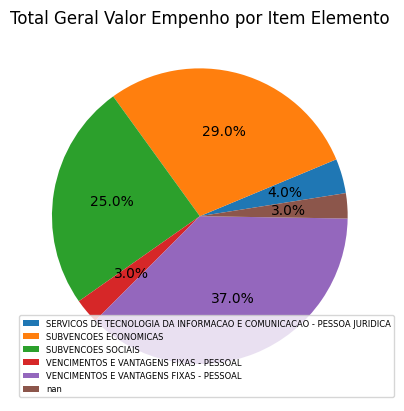

In [ ]:
import pandas as pd

df = pd.read_csv('/content/resulttotalporitemelemento.csv')


y = df['total_valor_empenho']
labels = df['descricao_item_elemento']

plt.pie(y.iloc[49:55],
        startangle=9,
        autopct = lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '')

plt.legend(df['descricao_item_elemento'].iloc[49:55], loc="lower left", fontsize=6)
plt.title('Total Geral Valor Empenho por Item Elemento')
plt.show()


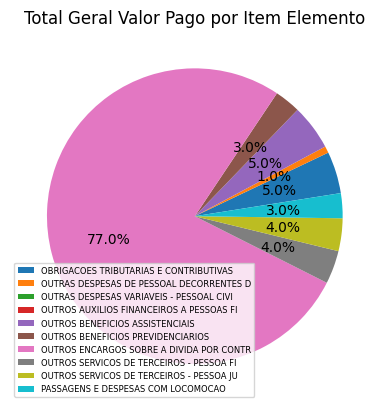

In [ ]:
import pandas as pd

df = pd.read_csv('/content/resulttotalporitemelemento.csv')


y = df['total_valor_pago']
labels = df['descricao_item_elemento']

plt.pie(y.iloc[30:40],
        startangle=9,
        autopct = lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '')

plt.legend(df['descricao_item_elemento'].iloc[30:40], loc="lower left", fontsize=6)
plt.title('Total Geral Valor Pago por Item Elemento')
plt.show()


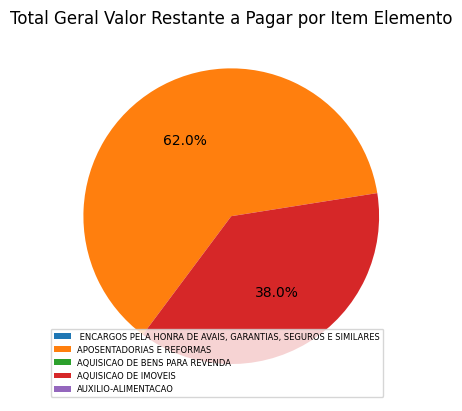

In [ ]:
import pandas as pd

df = pd.read_csv('/content/resulttotalporitemelemento.csv')


y = df['total_restante_pagar']
labels = df['descricao_item_elemento']

plt.pie(y.iloc[0:5],
        startangle=9,
        autopct = lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '')

plt.legend(df['descricao_item_elemento'].iloc[0:5], loc="lower left", fontsize=6)
plt.title('Total Geral Valor Restante a Pagar por Item Elemento')
plt.show()


##### Por Item_Grupo


Consulta SQL:

```postgresql
SELECT
ic.codigo_item_grupo
, ic.descricao_item_grupo
, SUM(e.valor_empenho) AS TOTAL_VALOR_EMPENHO
, SUM(e.valor_pago) AS TOTAL_VALOR_PAGO
, SUM(e.valor_restante_pagar) AS TOTAL_RESTANTE_PAGAR
FROM date_warehouse.dim_item i
INNER JOIN
data_warehouse.fato_execucao_financeira e
ON
i.codigo_item = e.codigo_item
INNER JOIN
data_warehouse.dim_item_grupo
ON
i.id_item_grupo = ic.codigo_item_grupo
GROUP BY
ic.codigo_item_grupo
, ic.codigo_item_grupo
```


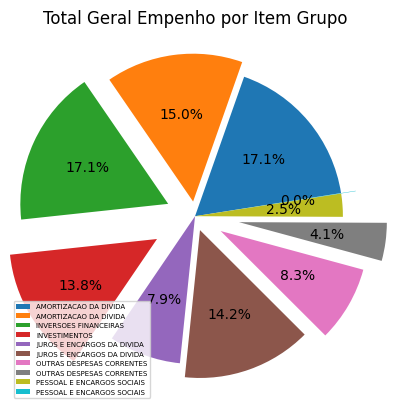

In [ ]:
import pandas as pd

df = pd.read_csv('/content/resulttotaisitemgrupo.csv')
df = df.dropna()

y = df['total_valor_empenho']
labels = df['descricao_item_grupo']

explode = (0.0, 0.1, 0.2, 0.3, 0.0, 0.1, 0.2, 0.3, 0.0, 0.1)
plt.pie(y,
        explode=explode,
        startangle=9,
        autopct = lambda p: '{:.1f}%'.format(p) if p > 0 else '')

plt.legend(df['descricao_item_grupo'], loc="lower left", fontsize=5)
plt.title('Total Geral Empenho por Item Grupo')
plt.show()


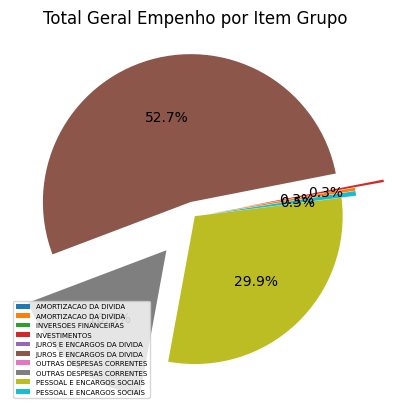

In [ ]:
import pandas as pd

df = pd.read_csv('/content/resulttotaisitemgrupo.csv')
df = df.dropna()

y = df['total_valor_pago']
labels = df['descricao_item_grupo']

explode = (0.0, 0.1, 0.2, 0.3, 0.0, 0.1, 0.2, 0.3, 0.0, 0.1)
plt.pie(y,
        explode=explode,
        startangle=9,
        autopct = lambda p: '{:.1f}%'.format(p) if p > 0 else '')

plt.legend(df['descricao_item_grupo'], loc="lower left", fontsize=5)
plt.title('Total Geral Empenho por Item Grupo')
plt.show()


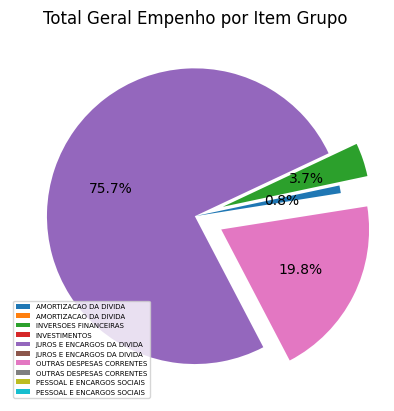

In [ ]:
import pandas as pd

df = pd.read_csv('/content/resulttotaisitemgrupo.csv')
df = df.dropna()

y = df['total_restante_pagar']
labels = df['descricao_item_grupo']

explode = (0.0, 0.1, 0.2, 0.3, 0.0, 0.1, 0.2, 0.3, 0.0, 0.1)
plt.pie(y,
        explode=explode,
        startangle=9,
        autopct = lambda p: '{:.1f}%'.format(p) if p > 0 else '')

plt.legend(df['descricao_item_grupo'], loc="lower left", fontsize=5)
plt.title('Total Geral Empenho por Item Grupo')
plt.show()
